# Data Wrangling 

In [1]:
import pandas as pd
#import pandas_profiling as pp
#pp.ProfileReport(df_contraceptives)
import warnings; warnings.simplefilter('ignore')

***
**Importing data from the World Bank on prevalence of contraceptive use between 1970-2019:**

In [2]:
df_contraceptives= pd.read_excel(r'C:\Users\aelshaer\Documents\Background Research\Data Analysis\Philippines\Family Planning\Data Sets\Contraceptives_World Bank.xlsx')

In [3]:
df_contraceptives.drop(['Country Code', 'Series Code'], axis=1, inplace=True)
df_contraceptives.drop(df_contraceptives.index[434:533], inplace= True)
df_contraceptives

,Country Name,Series Name,2019,2018,2017,2016,2015,2014,2013,2012,...,1979,1978,1977,1976,1975,1974,1973,1972,1971,1970
0,Afghanistan,"Contraceptive prevalence, any methods (% of wo...",..,..,..,..,22.5,..,..,..,...,..,..,..,..,..,..,1.6,..,..,..
1,Afghanistan,"Contraceptive prevalence, modern methods (% of...",..,..,..,..,19.8,..,..,13.8,...,..,..,..,..,..,..,1.6,..,..,..
2,Albania,"Contraceptive prevalence, any methods (% of wo...",..,46,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,Albania,"Contraceptive prevalence, modern methods (% of...",..,3.7,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Algeria,"Contraceptive prevalence, any methods (% of wo...",..,..,..,..,..,..,57.1,55.9,...,..,..,..,..,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,"Yemen, Rep.","Contraceptive prevalence, modern methods (% of...",..,..,..,..,..,..,25.2,..,...,1.6,..,..,..,..,..,..,..,..,..
430,Zambia,"Contraceptive prevalence, any methods (% of wo...",..,..,..,..,..,49,..,..,...,..,..,..,..,..,..,..,..,..,..
431,Zambia,"Contraceptive prevalence, modern methods (% of...",..,..,..,..,..,44.7,..,..,...,..,..,..,..,..,..,..,..,..,..
432,Zimbabwe,"Contraceptive prevalence, any methods (% of wo...",..,..,..,..,66.8,66.9,..,..,...,..,..,..,..,..,..,..,..,..,..


In [4]:
df_contraceptives.rename(columns = {'Country Name':'Country', 'Series Name':'Contraceptive'}, inplace=True)
contraceptives_long= pd.melt(df_contraceptives, id_vars=['Country','Contraceptive'], var_name='Year', value_name='Prevalence')
contraceptives_long

,Country,Contraceptive,Year,Prevalence
0,Afghanistan,"Contraceptive prevalence, any methods (% of wo...",2019,..
1,Afghanistan,"Contraceptive prevalence, modern methods (% of...",2019,..
2,Albania,"Contraceptive prevalence, any methods (% of wo...",2019,..
3,Albania,"Contraceptive prevalence, modern methods (% of...",2019,..
4,Algeria,"Contraceptive prevalence, any methods (% of wo...",2019,..
...,...,...,...,...
21695,"Yemen, Rep.","Contraceptive prevalence, modern methods (% of...",1970,..
21696,Zambia,"Contraceptive prevalence, any methods (% of wo...",1970,..
21697,Zambia,"Contraceptive prevalence, modern methods (% of...",1970,..
21698,Zimbabwe,"Contraceptive prevalence, any methods (% of wo...",1970,..


In [5]:
any_method=contraceptives_long[contraceptives_long.Contraceptive != 
                               'Contraceptive prevalence, any methods (% of women ages 15-49)']

In [6]:
any_method.rename(columns = {'Prevalence':'Countraceptive Prevalence (Any Method)'}, inplace=True)
any_method.drop('Contraceptive', axis=1, inplace=True)
any_method.sort_values(by=['Year'], ascending=True, inplace=True)

In [7]:
any_method

,Country,Year,Countraceptive Prevalence (Any Method)
21699,Zimbabwe,1970,..
21421,Greenland,1970,..
21419,Greece,1970,..
21417,Gibraltar,1970,..
21415,Ghana,1970,..
...,...,...,...
279,Netherlands,2019,..
277,Nepal,2019,..
275,Nauru,2019,..
297,Oman,2019,..


In [8]:
modern_method=contraceptives_long[contraceptives_long.Contraceptive !='Contraceptive prevalence, modern methods (% of women ages 15-49)']

***
**Importing 2019 data on modern contraceptives from the PRB:**

In [9]:
df_modern_contraceptives= pd.read_csv(r'C:\Users\aelshaer\Documents\Background Research\Data Analysis\Philippines\Family Planning\Data Sets\modern contraceptives_prb data.csv')

In [10]:
df_modern_contraceptives.set_index(['Type'], inplace=True)

In [11]:
df_modern_contraceptives.drop(['FIPS','TimeFrame'], axis=1, inplace=True)

In [12]:
df_modern_contraceptives

,Name,Data
Type,,
World,WORLD,0.54
Sub-Region,AFRICA,0.32
Sub-Region,NORTHERN AFRICA,0.46
Country,Algeria,0.50
Country,Egypt,0.57
...,...,...
Country,Samoa,0.24
Country,Solomon Islands,0.24
Country,Tonga,0.28


***
# Exploratory Data Analysis

**Importing major python libraries for executing data analysis/visiualization and statistical computing:**

In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
from IPython import display
from ipywidgets import interact, widgets
import sklearn
import seaborn as sns

from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
from scipy.stats import spearmanr

import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib inline

## Global Status

### Percent of Married Women 15-49 Using Contraception by Country, Modern Methods 2019

In [12]:
import IPython
url = 'https://www.prb.org/international/indicator/fp-total-modern/map/country'
iframe = '<iframe src="https://datacenter.prb.org/embed/international/indicator/fp-total-modern/map/country/2019" style="height:100vh;width:100%"></iframe>' + url
IPython.display.HTML(iframe)

### Percent of Married Women 15-49 Using Contraception by Region, Modern Methods 2019

In [13]:
import IPython
url = 'https://www.prb.org/international/indicator/fp-total-modern/map/subregion'
iframe = '<iframe src="https://datacenter.prb.org/embed/international/indicator/fp-total-modern/map/subregion/2019" style="height:100vh;width:100%"></iframe>' + url
IPython.display.HTML(iframe)

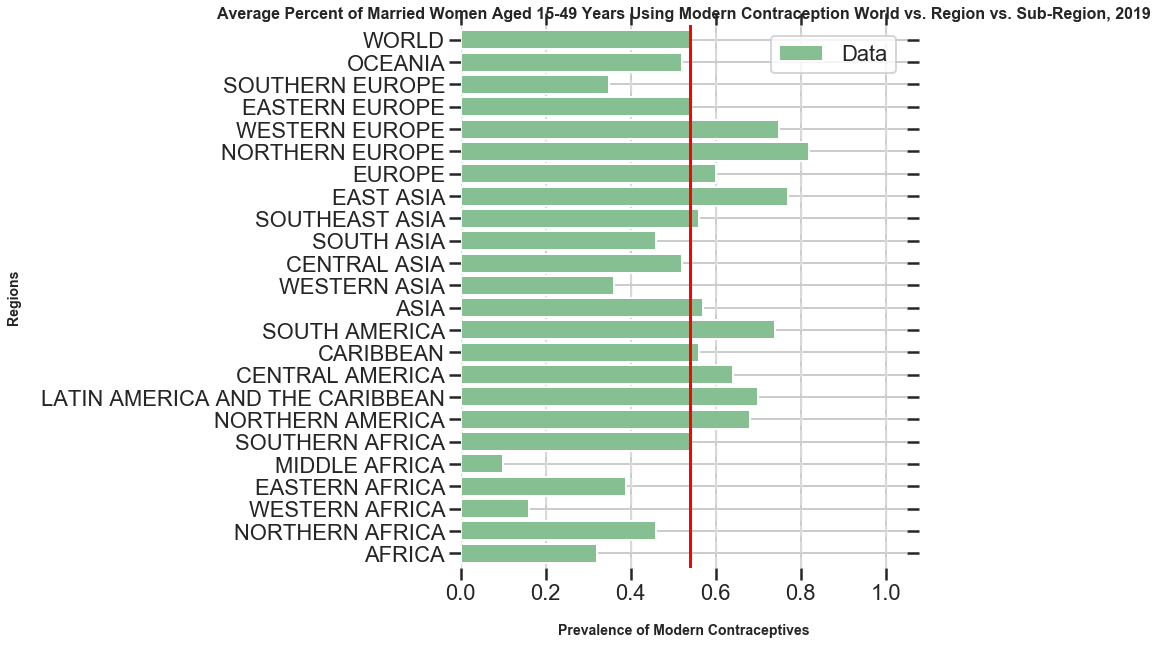

In [18]:
# Plotting a horizontal bar graph to clearly show the prevalence of modern contraceptives by region worldwide

subregion=df_modern_contraceptives.loc[['Sub-Region','World']]
S= subregion.dropna()

ax = S.plot(x='Name', y='Data', kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

  # Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  # Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
      ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)


  # Set x-axis label
ax.set_xlabel("Prevalence of Modern Contraceptives", labelpad=20, weight='bold', size=14)

  # Set y-axis label
ax.set_ylabel("Regions", labelpad=20, weight='bold', size=14)

  # Set title axis 
ax.set_title("Average Percent of Married Women Aged 15-49 Years Using Modern Contraception World vs. Region vs. Sub-Region, 2019", fontsize=16, weight='bold')

plt.axvline(x=0.54,linewidth=3, color='r')

**Data obtained from the Population Reference Bureau**

Through the prevalent use of modern contraceptives, the current status of family planning is generally progressing. However, sub-Sharan Africa seems to be the only major region as a whole that is below the global average. The average prevalence of modern contraceptives use in all of Asia is above the global average at 0.58 percent. When looking at disaggregated prevalence level for the sub-regions, such as South Asia, Central Asia, and Western Asia, they all are all lagging behind; with the exception of SouthEast Asia being above the world average of 0.57 percent. 

***
# Linear Regression Analysis on Family Planning in the Philippines

In [19]:
df_var=pd.read_excel(r'C:\Users\aelshaer\Documents\Background Research\Data Analysis\Philippines\Family Planning\Data Sets\FP Influencing Variables.xlsx')

In [20]:
df_var.set_index('Year', inplace=True)

In [44]:
df_var.head()

,Contraceptive Prevalence,Literacy Rate,Infant Mortality Rate,U5 Mortality Rate,MMR,Urban Growth,Salaried Female Workers,Fertility Rate,OOP HE >25%,2nd School Progress,Prim School Completion,Air Pollution,Physicians,2nd School Completion
Year,,,,,,,,,,,,,,
1970,NaN,NaN,55.2,83.7,NaN,3.817700,NaN,6.264,NaN,NaN,NaN,NaN,0.111,NaN
1971,NaN,NaN,54.9,83.0,NaN,4.426404,NaN,6.152,NaN,NaN,NaN,NaN,NaN,NaN
1972,NaN,NaN,54.6,82.5,NaN,4.409831,NaN,6.041,NaN,NaN,NaN,NaN,NaN,NaN
1973,NaN,NaN,54.5,82.3,NaN,4.377902,NaN,5.931,NaN,NaN,NaN,NaN,NaN,NaN
1974,NaN,NaN,54.4,82.2,NaN,4.345091,NaN,5.824,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_var.rename(columns = {'Contraceptive prevalence, modern methods (% of women ages 15-49)':'Contraceptive Prevalence',
                            'Literacy rate, adult female (% of females ages 15 and above)':'Literacy Rate',
                            'Mortality rate, infant (per 1,000 live births)':'Infant Mortality Rate',
                            'Mortality rate, under-5 (per 1,000 live births)':'U5 Mortality Rate', 
                            'Maternal mortality ratio (national estimate, per 100,000 live births)':'MMR',
                            'Urban population growth (annual %)':'Urban Growth',
                            'Wage and salaried workers, female (% of female employment) (modeled ILO estimate)':'Salaried Female Workers',
                            'Fertility rate, total (births per woman)':'Fertility Rate',
                            'Proportion of population spending more than 25% of household consumption or income on out-of-pocket health care expenditure (%)':'OOP HE >25%',
                            'Progression to secondary school, female (%)':'2nd School Progress',
                            'Primary completion rate, female (% of relevant age group)':'Prim School Completion',
                            'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)':'Air Pollution',
                            'Physicians (per 1,000 people)':'Physicians',
                            'Lower secondary completion rate, female (% of relevant age group)':'2nd School Completion'}, inplace = True) 

### Indicators Meaning:
* Contraceptive Prevalence - Contraceptive prevalence, modern methods (% of women ages 15-49)

* Literacy Rate - Literacy rate, adult female (% of females ages 15 and above) 
                            
* Infant Mortality Rate - Mortality rate, infant (per 1,000 live births)

* U5 Mortality Rate - Mortality rate, under-5 (per 1,000 live births) 

* MMR - Maternal mortality ratio (national estimate, per 100,000 live births)

* Urban Growth: Urban population growth (annual %)

* Salaried Female Workers - Wage and salaried workers, female (% of female employment)

* Fertility Rate - Fertility rate, total (births per woman)

* OOP HE >25% - Proportion of population spending more than 25% of household consumption or income on out-of-pocket health care expenditure (%)

* 2nd School Progress - Progression to secondary school, female (%)

* Prim School Completion - Primary completion rate, female (% of relevant age group)
                            
* Air Pollution - PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)
 
* Physicians - Physicians (per 1,000 people)

* 2nd School Completion - Lower secondary completion rate, female (% of relevant age group)

In [23]:
for col in df_var:
    df_var[col] = pd.to_numeric(df_var[col], errors='coerce')

In [24]:
var_inter =df_var.interpolate()

In [25]:
var_inter.describe()

,Contraceptive Prevalence,Literacy Rate,Infant Mortality Rate,U5 Mortality Rate,MMR,Urban Growth,Salaried Female Workers,Fertility Rate,OOP HE >25%,2nd School Progress,Prim School Completion,Air Pollution,Physicians,2nd School Completion
count,42.000000,40.000000,50.000000,50.000000,30.000000,50.000000,29.000000,50.000000,23.000000,22.000000,39.000000,30.000000,50.000000,22.000000
mean,29.264286,93.239222,37.454000,53.002000,229.716667,3.001529,51.930931,4.199480,1.016403,96.899586,94.668206,21.696221,0.694624,82.085180
std,7.818036,4.050559,12.379117,21.100135,88.287869,1.323694,3.729855,1.039761,0.322554,1.083937,6.946145,1.645669,0.549585,5.640696
min,16.200000,82.762154,22.500000,28.400000,160.000000,1.464890,47.865002,2.640000,0.613478,92.643290,86.316132,18.069799,0.108000,72.544880
25%,22.145000,92.525898,25.900000,33.425000,170.875000,1.926319,49.027000,3.376500,0.648695,96.890660,87.898139,21.977509,0.124250,75.674465
50%,31.500000,93.885210,33.050000,44.750000,214.500000,2.157421,50.730000,4.030500,0.998801,97.008175,93.792890,22.113231,0.809250,84.458416
75%,35.891667,96.066063,51.525000,77.075000,220.000000,4.331572,54.334999,4.954250,1.354233,97.504621,98.467940,22.664903,1.244275,85.347463
max,40.100000,98.241750,55.200000,83.700000,517.000000,5.212508,59.915001,6.264000,1.414777,98.136350,109.614200,23.592316,1.275000,90.442900


In [26]:
var_inter

,Contraceptive Prevalence,Literacy Rate,Infant Mortality Rate,U5 Mortality Rate,MMR,Urban Growth,Salaried Female Workers,Fertility Rate,OOP HE >25%,2nd School Progress,Prim School Completion,Air Pollution,Physicians,2nd School Completion
Year,,,,,,,,,,,,,,
1970,NaN,NaN,55.2,83.7,NaN,3.817700,NaN,6.264,NaN,NaN,NaN,NaN,0.111000,NaN
1971,NaN,NaN,54.9,83.0,NaN,4.426404,NaN,6.152,NaN,NaN,NaN,NaN,0.111400,NaN
1972,NaN,NaN,54.6,82.5,NaN,4.409831,NaN,6.041,NaN,NaN,NaN,NaN,0.111800,NaN
1973,NaN,NaN,54.5,82.3,NaN,4.377902,NaN,5.931,NaN,NaN,NaN,NaN,0.112200,NaN
1974,NaN,NaN,54.4,82.2,NaN,4.345091,NaN,5.824,NaN,NaN,NaN,NaN,0.112600,NaN
1975,NaN,NaN,54.3,82.0,NaN,4.222710,NaN,5.718,NaN,NaN,NaN,NaN,0.113000,NaN
1976,NaN,NaN,54.2,81.9,NaN,3.772013,NaN,5.613,NaN,NaN,NaN,NaN,0.116000,NaN
1977,NaN,NaN,54.1,81.6,NaN,3.740153,NaN,5.506,NaN,NaN,NaN,NaN,0.119000,NaN
1978,16.200000,NaN,53.8,81.0,NaN,3.721052,NaN,5.399,NaN,NaN,NaN,NaN,0.122000,NaN


Text(0, 0.5, 'Contraceptive Prevalence, modern methods')

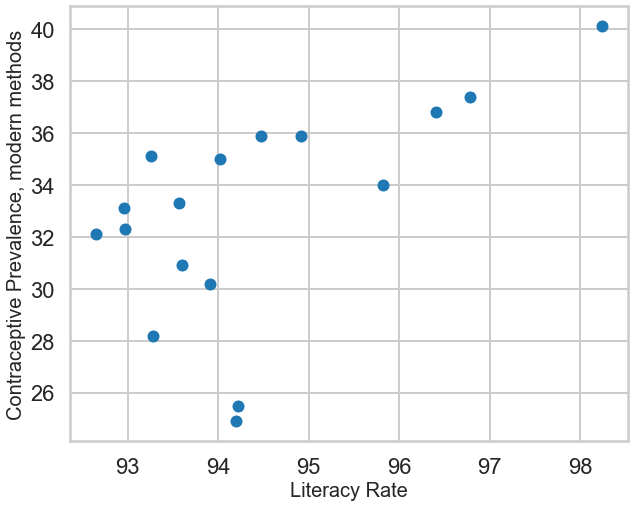

In [27]:
plt.figure(figsize=(10,8))
plt.scatter(var_inter['Literacy Rate'], df_var['Contraceptive Prevalence'], s=100)
plt.xlabel("Literacy Rate", fontsize= 20)
plt.ylabel("Contraceptive Prevalence, modern methods", fontsize= 20)

### Testing Relationships between FP (contraceptive prevalence) and other different factors 

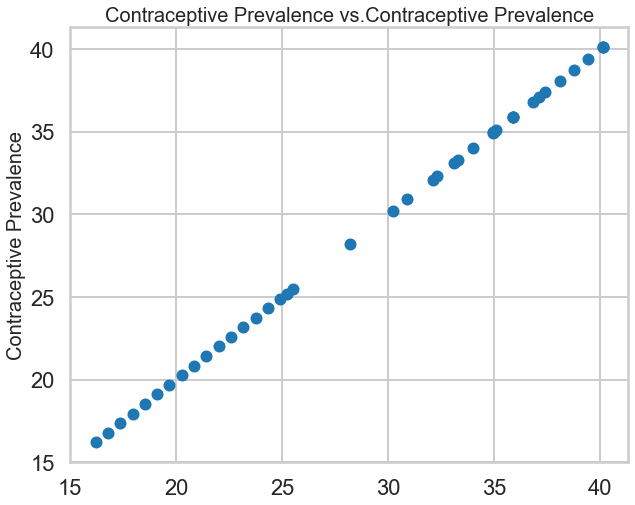

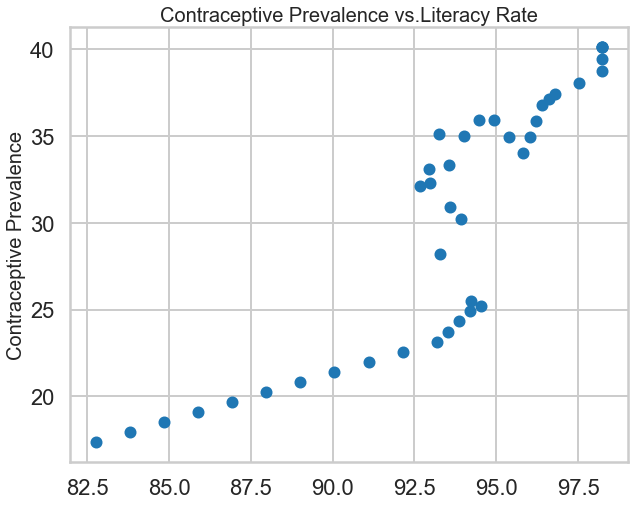

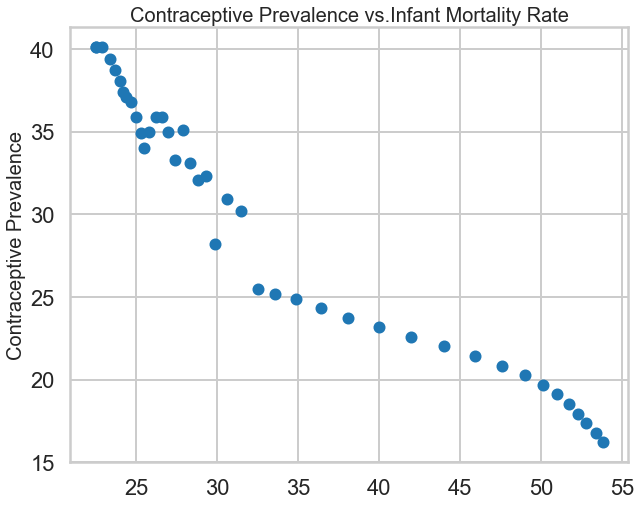

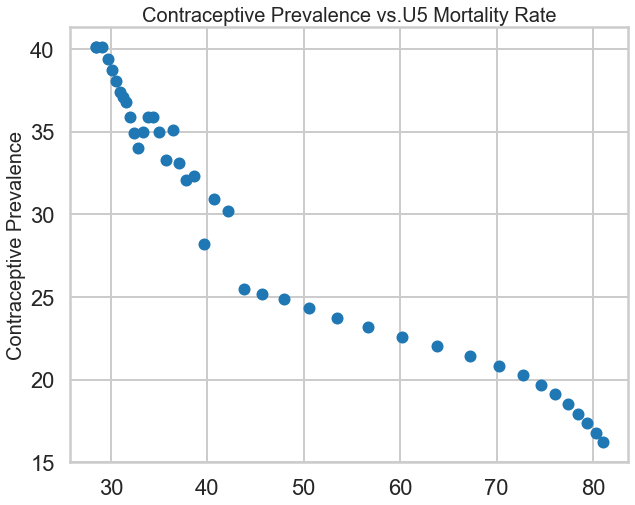

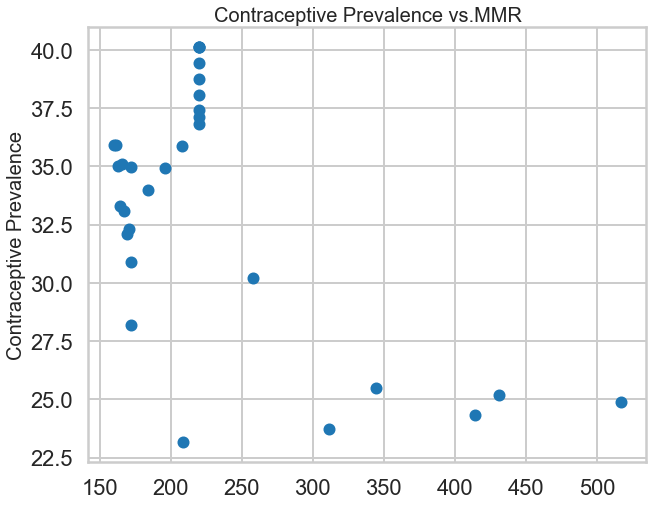

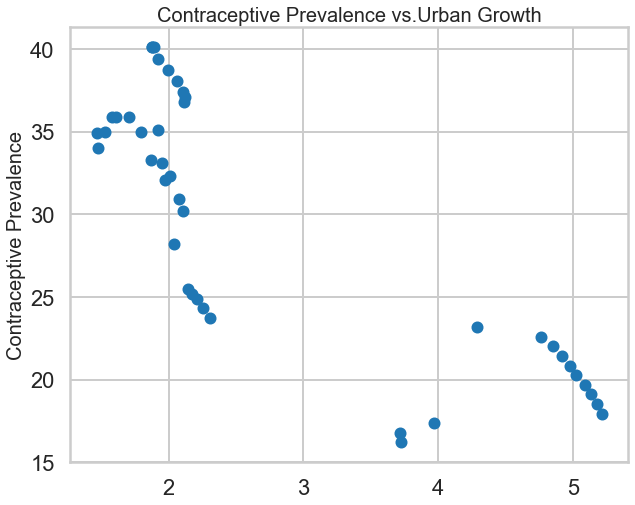

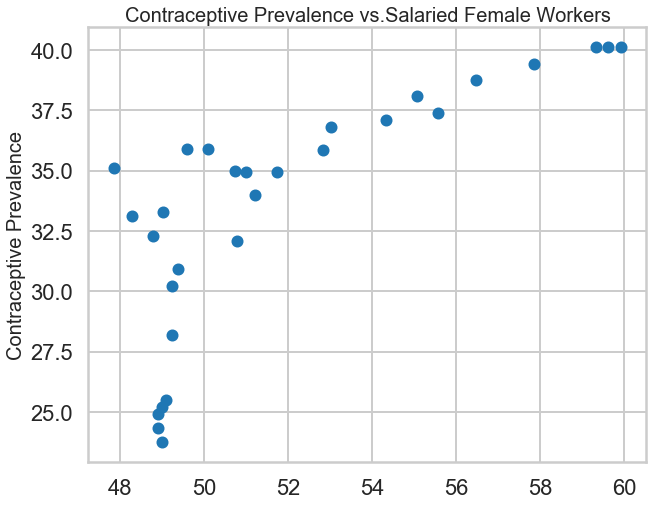

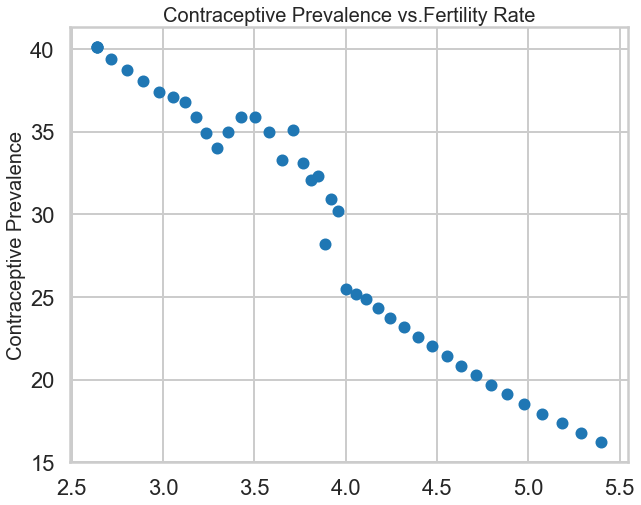

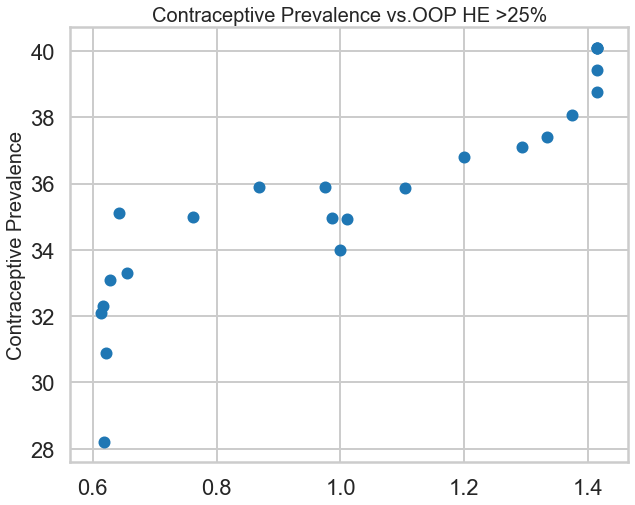

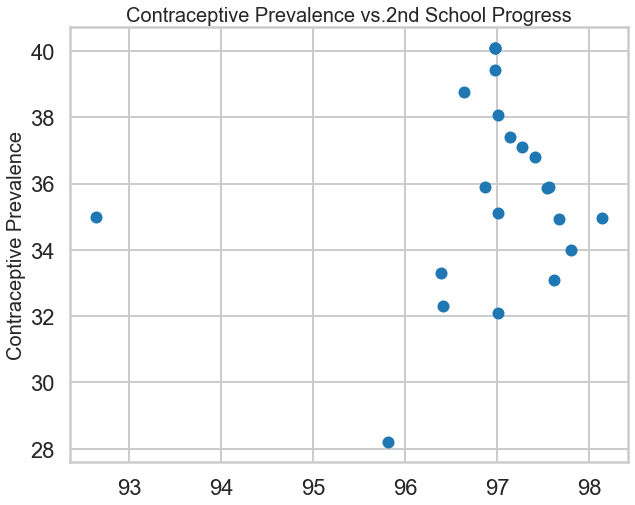

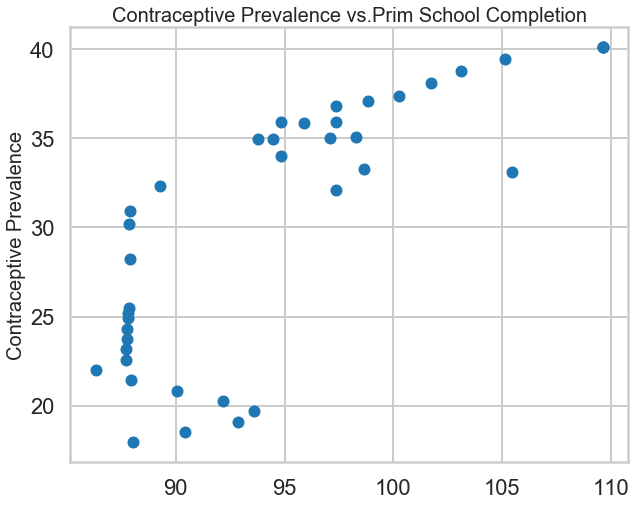

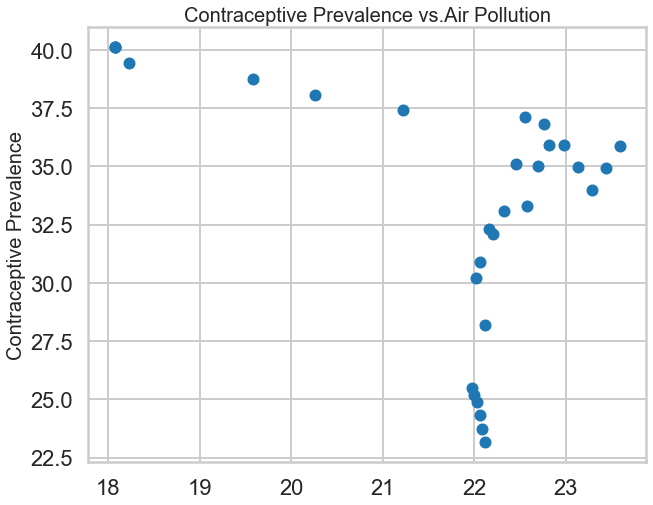

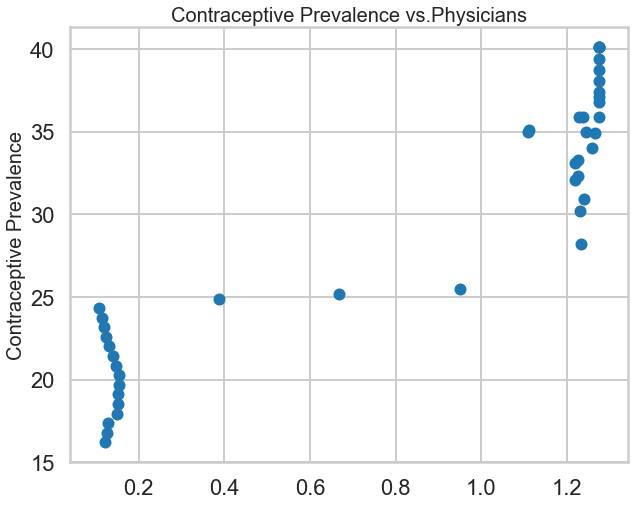

In [28]:
# Testing Relationships between FP (contraceptive prevalence) and other different factors 

for i in range(len(var_inter.columns)-1):
    plt.figure(figsize=(10,8))
    plt.scatter(var_inter.iloc[:,i], var_inter["Contraceptive Prevalence"], s=100)
    plt.title("Contraceptive Prevalence vs." + var_inter.columns[i], fontsize=20)
    plt.ylabel("Contraceptive Prevalence", fontsize= 20)
    plt.show()

### The difference in the linear regression coefficient between Infant Mortality and U-5 Mortality 

In [31]:
phl= ols('CP ~ IMR', df_mod).fit()

phl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     CP   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     562.0
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           3.65e-25
Time:                        12:46:59   Log-Likelihood:                -88.521
No. Observations:                  42   AIC:                             181.0
Df Residuals:                      40   BIC:                             184.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.3118      1.062     50.193      0.000      51.165      55.458
IMR           -0.7031      0.030    -23.706      0.000      -0.763      -0.643
==============================================================================
Omnibus:                        6.081   Durbin-Watson:                   0.363
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                5.539
Skew:                          -0.889   Prob(JB):                       0.0627
Kurtosis:                       3.044   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
phl= ols('CP ~ U5MR', df_mod).fit()

phl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     CP   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     474.4
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           8.52e-24
Time:                        13:06:04   Log-Likelihood:                -91.824
No. Observations:                  42   AIC:                             187.6
Df Residuals:                      40   BIC:                             191.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.8183      0.960     50.841      0.000      46.878      50.759
U5MR          -0.4125      0.019    -21.780      0.000      -0.451      -0.374
==============================================================================
Omnibus:                        5.008   Durbin-Watson:                   0.311
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                4.518
Skew:                          -0.803   Prob(JB):                        0.104
Kurtosis:                       2.935   Cond. No.                         143.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Amongst these key development indicators from the World Bank, there is a a positive correlation between literacy rates and percent of female salaried workers. As either of these indicators increase, so does the prevalent use of contraceptives. Additionally, a less surprising relationship is that if infant mortality and U5 mortality increases then contraceptive use will decrease. Thus, in order to improve the promotion of FP in the Philippines, then infant and child health and nutrition should be integrated together with family planning if not done so already. For example, data conveys that neonatal disorder and enteric infections are amongst attributable causing deaths to children [IHME](https://vizhub.healthdata.org/gbd-compare/). Congenital Pneumonia is one of the top leading causes of infant mortality in th Philippines [Philippines Department of Health](https://www.doh.gov.ph/Statistics/Infant-Mortality-Ten-Leading-Causes). Preventive obstetrics is most important in reducing these disorders, such as regular antenatal check-up, balanced diet, iron and folic acid tablet supplementation. <br> 

Through a statistical results of a regression analysis. The p-value value is very small it can be interpreted as 0. Since the p-value is smaller than the alpha-level of 0.05, it signifies that infant mortality rate is a statistically significant predictor of contreception use in the Philippines. The regression coefficient is -0.703 meaning a one unit increase in infant mortality rate is associated with a decrease of 0.7 in contraceptive prevalence use net of other variables. Althought it is an obvious statement to say that FP is affected by infant mortality; next level thinking is how can we use this influencing variable to increase social diffusion of FP. One example is to integrate MNCH and FP and improving health service.

An interesting note to mention is that the regression results of under-5 mortality rate has a regression coefficient almost double less than infant mortality rate. Meaning that one unit increase in u-5 child mortality is associated with an decrease of -0.4 in contraceptive prevalence use net of infant mortality, which has an associationg of -0.7 decrease in contracetive prevalence use. It is obvious to conceptualize that families who have lost children are more likely to concieve more children thus is the reason behind this signifcant downfall association of the prevalent use of contraceptives. However, an interesting research question here is to understand the different drivers (if any) for parents to concieve children. How does the death of a child influence parents to concieve children? Do parents permanently change their attitudes toward FP after losing a child? Does the age at which loosing a child an influencing factor for parents wanting to concieve more children? 

These are important questions to asnwer because the prevalent use of contraception is a social transformation
heavily influenced by the climate of opinion and perceptions of how others are behaving. Since inftant mortality and child mortality (U-5) are both predictors in the prevalence of modern contraceptive use, understanding exactly how this could affect behavior will help promote family planning accordingly. Without the social norms of contraception then it would not
induce an increasing desire to control family size in the first place. 

### Analysis between the relationship of Urban Growth and Prevalence of Contraception 

Text(0.5, 1.0, 'Contraceptive Prevalence vs. Annual Urban Growth (%)')

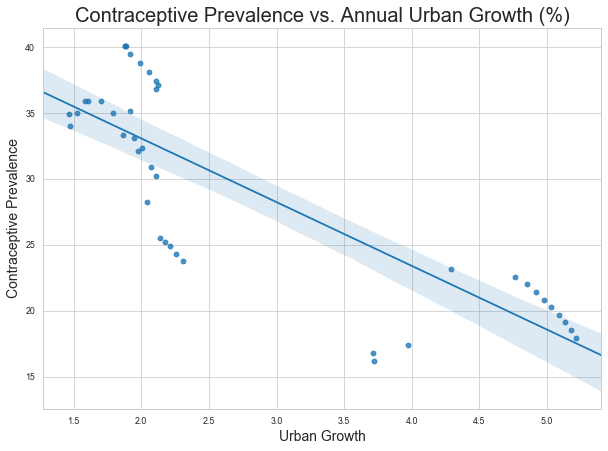

In [45]:
plt.figure(figsize=(10,7))
sns.regplot(y="Contraceptive Prevalence", x="Urban Growth",data=var_inter, fit_reg=True)
plt.title("Contraceptive Prevalence vs. Annual Urban Growth (%)", fontsize=20)


In [ ]:
# corr = pearsonr(data1, data2)
# print('Pearsons correlation: %.3f' % corr)

# corr = spearmanr(data1, data2)
# print('Spearmans correlation: %.3f' % corr)

In [40]:
phl1= ols('CP ~ UG', df_mod).fit()

phl1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     CP   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     84.73
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           1.99e-11
Time:                        15:29:07   Log-Likelihood:                -121.58
No. Observations:                  42   AIC:                             247.2
Df Residuals:                      40   BIC:                             250.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.7241      1.618     26.412      0.000      39.455      45.993
UG            -4.8332      0.525     -9.205      0.000      -5.894      -3.772
==============================================================================
Omnibus:                        2.900   Durbin-Watson:                   0.257
Prob(Omnibus):                  0.235   Jarque-Bera (JB):                2.463
Skew:                          -0.482   Prob(JB):                        0.292
Kurtosis:                       2.309   Cond. No.                         7.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interestingly, the plot above shows a negative correlation between the annual growth of Urban Population and contraceptive prevalence. The regression analysis results show a regression coeiffient of -4.83 meaning a one unit increase in urban growth is associated with an decrease of 4.8 in contraceptive prevalence use net of other variables. However, I need to calcualte and compare the pearson correlation coefficient and spearman's coefficient to provide more robust evidence on the relationship between contraceptive prevalence and urban growth. I am unbel to calculate it due to missing data, which I plan to solve using the k-nearest neighbors (KNN) algorithm, however I am having issues importing appropriate packages into this notebook. Thus not allowing me to conduct a robust analysis. If this is true, then what aspect of urbanization is causing a decrease in prevalence of contraceptive?    

### Plotting multiple variables aganist each other to look for correlations between predictors

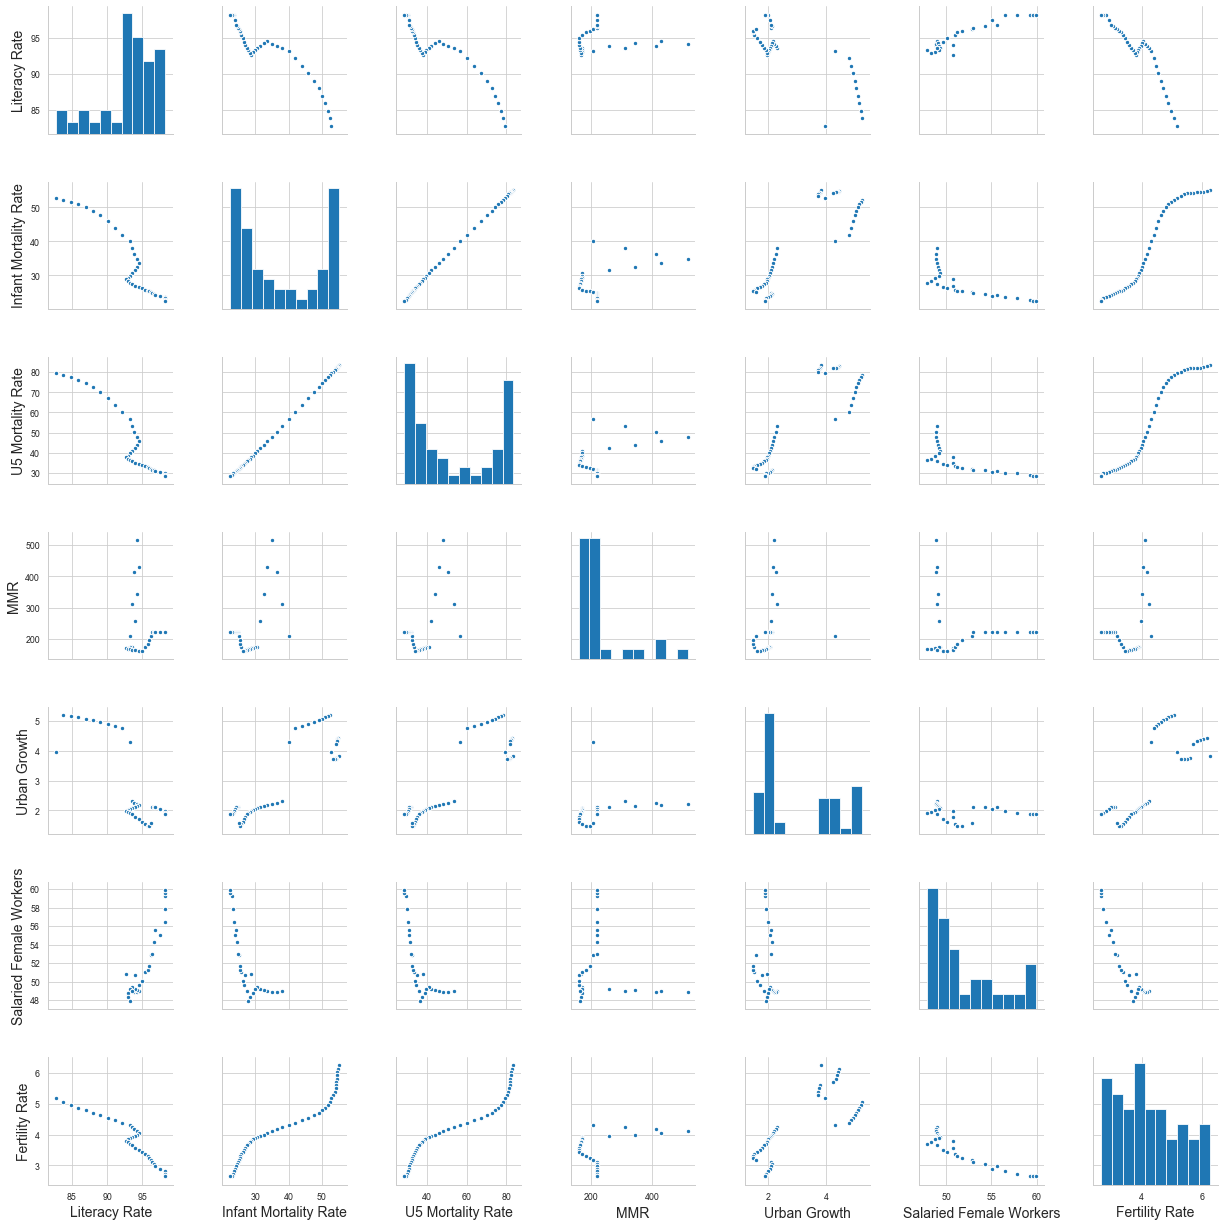

In [43]:
# Plotting multiple variables aganist each other to look for correlations between predictors 
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":12,"axes.labelsize":14})   
data=var_inter[['Literacy Rate',
                'Infant Mortality Rate',
                'U5 Mortality Rate',
                'MMR',
                'Urban Growth', 
                'Salaried Female Workers',
                'Fertility Rate']]
sns.pairplot(data,plot_kws=dict(s=20,linewidth=1))

A couple of notes to mention from the analysis above:

* Annual urban growth seems to have a positive relationship with infant mortality rate and u-5 mortality rate. Thus as Urbanization increases then infant mortality and u-5 mortality also increases. 

* Urban growth seems to have a negative correlation with literacy rates that is as urbanization increases literacy rates decreases. 

This is starting to paint a picture on the effects of urbanization is having on the Philippines and it is negatively affecting the contraceptives, infant and child mortality rates, and literacy rates. 

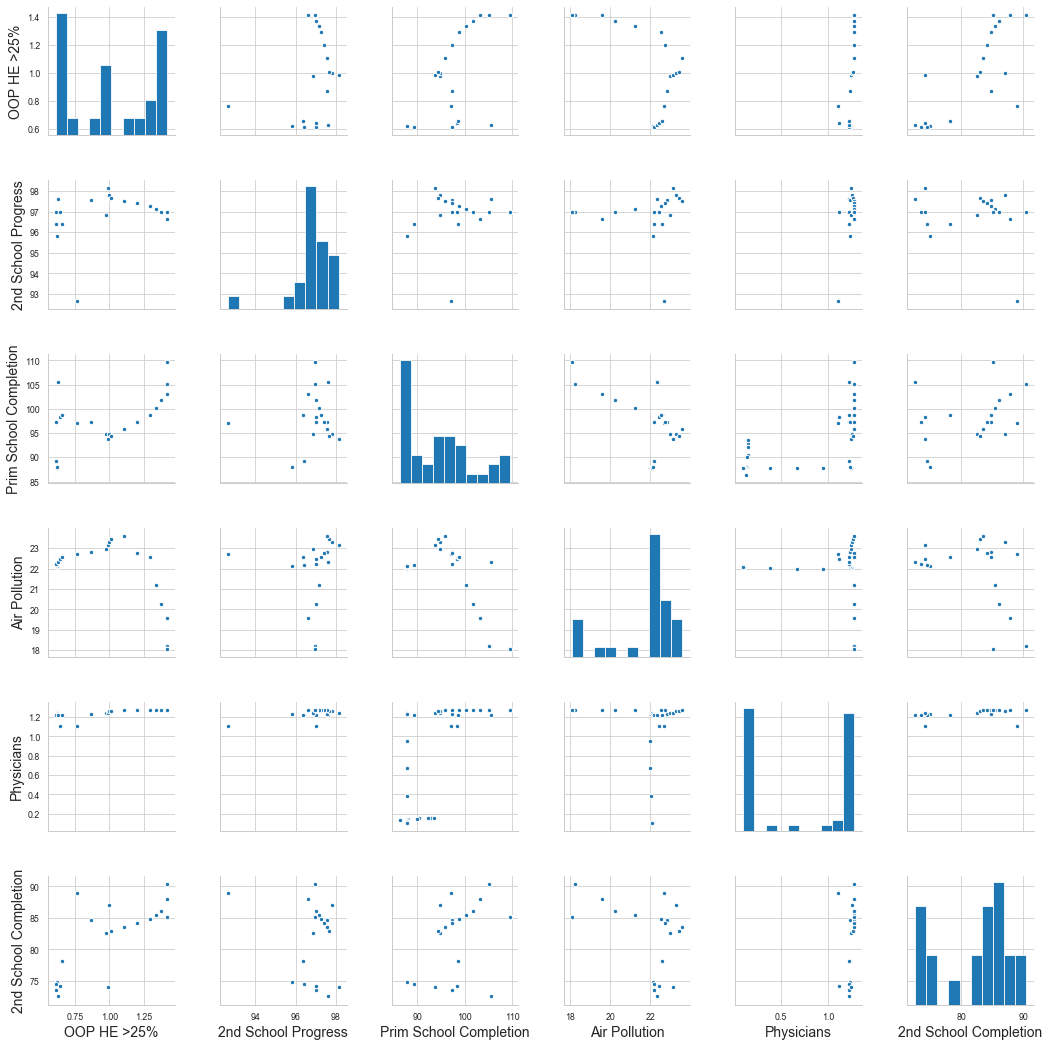

In [46]:
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":12,"axes.labelsize":14})   
data=var_inter[['OOP HE >25%',
                '2nd School Progress',
                'Prim School Completion',
                'Air Pollution', 
                'Physicians', 
                '2nd School Completion']]
sns.pairplot(data,plot_kws=dict(s=20,linewidth=1))           
                

In [30]:
df_mod=var_inter.rename(columns = {'Contraceptive Prevalence':'CP',
                                   'Literacy Rate':'LR',
                                   'Infant Mortality Rate':'IMR',
                                   'U5 Mortality Rate':'U5MR',
                                   'Urban Growth':'UG',
                                   'Salaried Female Workers':'SFW',
                                   'Fertility Rate':'FR',
                                   'OOP HE >25%':'OOP',
                                   '2nd School Progress':'2SP',
                                   'Prim School Completion':'PSC',
                                   'Air Pollution':'AP',
                                   '2nd School Completion':'2SC'}) 